In [32]:
import numpy as np 
import pandas as pd 
from sklearn import svm
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

sns.set(font_scale=1.2)
recipes = pd.read_csv(r"C:\Users\Admin\Downloads\archive\recipes_muffins_cupcakes.csv")
print("Dataset Head:\n", recipes.head())
print("\nShape of dataset:", recipes.shape)

Dataset Head:
      Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     55    28      3       7    5              2        0     0
1  Muffin     47    24     12       6    9              1        0     0
2  Muffin     47    23     18       6    4              1        0     0
3  Muffin     45    11     17      17    8              1        0     0
4  Muffin     50    25     12       6    5              2        1     0

Shape of dataset: (20, 9)


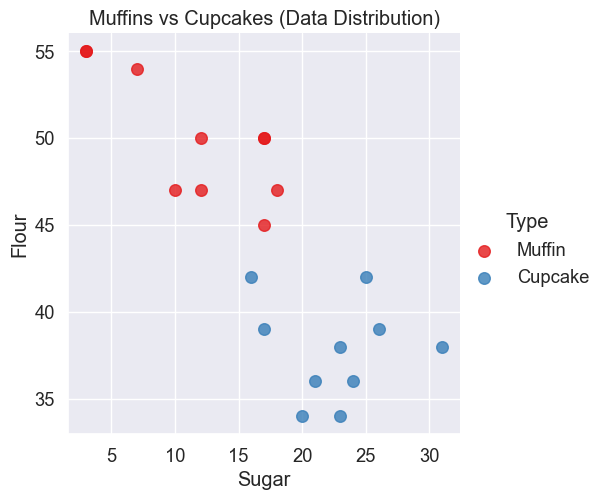

In [33]:
# -----------------------------
# Plot Raw Data
# -----------------------------
sns.lmplot(x='Sugar', y='Flour', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.title("Muffins vs Cupcakes (Data Distribution)")
plt.show()

In [34]:

X = recipes[['Sugar', 'Flour']].values
y = np.where(recipes['Type'] == 'Muffin', 0, 1)

model = svm.SVC(kernel='linear')
model.fit(X, y)


SVC(kernel='linear')

In [35]:
# -----------------------------
# Get Model Parameters
# -----------------------------
w = model.coef_[0]
a = -w[0] / w[1]        # slope of decision boundary
xx = np.linspace(5, 30)
yy = a * xx - (model.intercept_[0]) / w[1]

# Margins through support vectors
b_down = model.support_vectors_[0]
yy_down = a * xx + (b_down[1] - a * b_down[0])

b_up = model.support_vectors_[-1]
yy_up = a * xx + (b_up[1] - a * b_up[0])


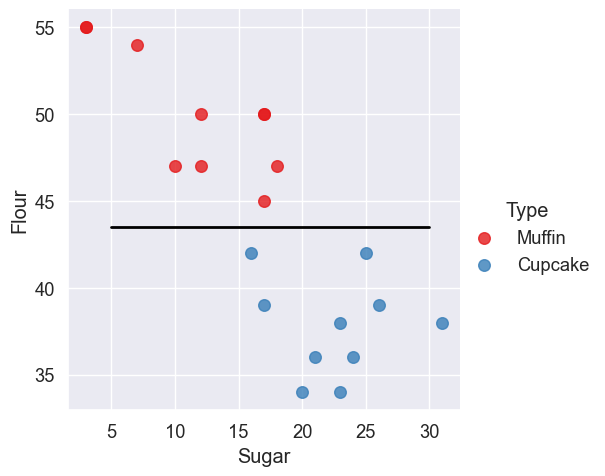

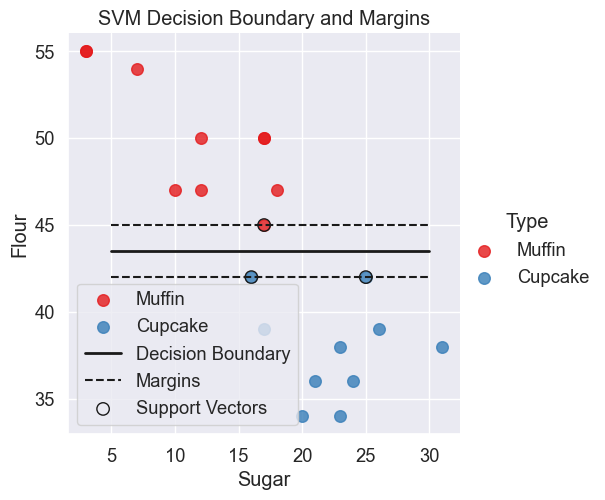

In [36]:
# -----------------------------
# Plot Decision Boundary + Margins
# -----------------------------
sns.lmplot(x='Sugar', y='Flour', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx,yy,linewidth=2,color='black')
plt.show()

sns.lmplot(x='Sugar', y='Flour', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, 'k-', linewidth=2, label='Decision Boundary')
plt.plot(xx, yy_down, 'k--', label='Margins')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=80, facecolors='none', edgecolors='k', label='Support Vectors')
plt.legend()
plt.title("SVM Decision Boundary and Margins")
plt.show()


In [37]:

# Split Data for Performance Evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = svm.SVC(kernel='linear')
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

# Model Performance

print("\nPredicted Labels:", y_pred)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))



Predicted Labels: [0 1 0 0]

Confusion Matrix:
 [[2 0]
 [1 1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

